#***Potrebne biblioteke:***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/MyDrive/data.csv', 'r') as f:
    print(f.readlines())

['StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass\n', '1001,17,1,0,2,19.833722807854713,7,1,2,0,0,1,0,2.929195591667681,2.0\n', '1002,18,0,0,1,15.40875605584674,0,0,1,0,0,0,0,3.042914833436377,1.0\n', '1003,15,0,2,3,4.21056976881226,26,0,2,0,0,0,0,0.1126022544661815,4.0\n', '1004,17,1,0,3,10.028829473958215,14,0,3,1,0,0,0,2.0542181397029484,3.0\n', '1005,17,1,0,2,4.6724952729713305,17,1,3,0,0,0,0,1.2880611817953875,4.0\n', '1006,18,0,0,1,8.191218545250186,0,0,1,1,0,0,0,3.0841836144863937,1.0\n', '1007,15,0,1,1,15.601680474699295,10,0,3,0,1,0,0,2.748237414891583,2.0\n', '1008,15,1,1,4,15.424496305808074,22,1,1,1,0,0,0,1.360142712316461,4.0\n', '1009,17,0,0,0,4.562007558047703,1,0,2,0,1,0,1,2.896819189513569,2.0\n', '1010,16,1,0,1,18.444466363097202,0,0,3,1,0,0,0,3.5734742103297656,0.0\n', '1011,17,0,0,1,11.851363655296536,11,0,1,0,0,0,0,2.1471716250185144,3.0\n', '1012,17,0,0,1,7.

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")
data.head(100)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4.0
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4.0
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2.0
98,1099,16,0,0,3,8.603518,25,0,2,1,0,1,1,0.744322,4.0


#***Korelacija:***

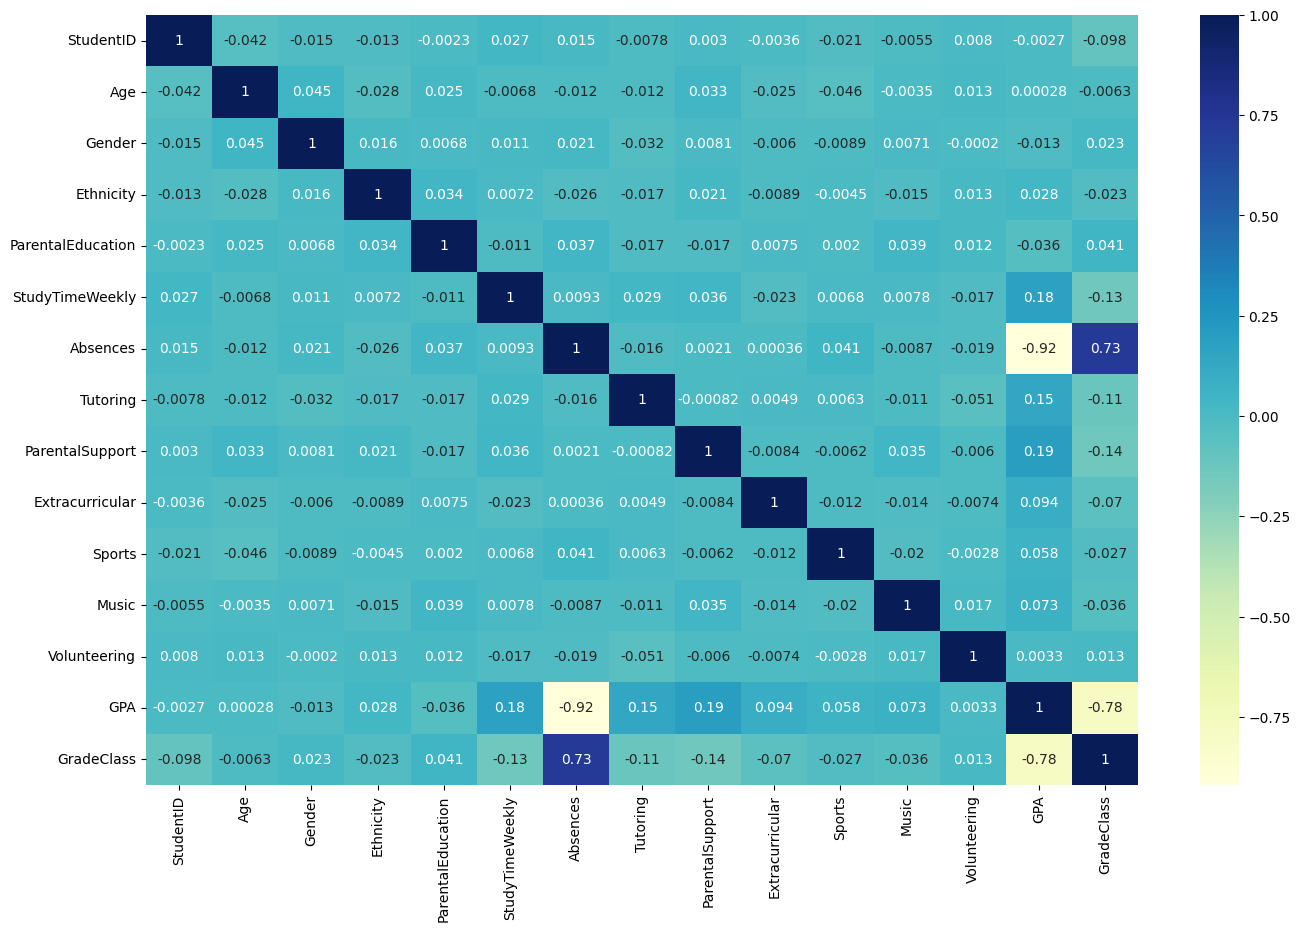

In [5]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

***Tumačenje heatmap-e:***
* Između Absences i GPA (-0.92) postoji vrlo jaka negativna korelacija, kada se vrijednost jednog atributa povećava, vrijednost drugog atributa opada, i obrnuto
* Između StudyTimeWeekly i GPA (0.19) postoji slaba pozitivna korelacija, što sugeriše da više učenja može blago povećati GPA
* Između Absences i GradeClass (0.73) postoji pozitivna korelacija što sugeriše da što je veći broj izostanaka, to je veća ocjena (kontraintuitivno)
* Druge varijable imaju slabe ili neutralne korelacije (blizu nule), što znači da nema jakog odnosa između tih varijabli



***Provjera da li imamo null vrijednosti u datasetu:***

In [6]:
data.isnull().values.any()

False

# ***Podjela podatka na train i test skup:***

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(len(df_train))
print(len(df_test))

1913
479


In [8]:
# posto id studenta ima nisku korelaciju, onda njega mozemo izbaciti:
df_train.pop('StudentID')
df_train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,18,1,0,0,13.782867,9,0,2,1,0,0,0,2.637594,2.0
1,18,0,0,3,10.767684,4,0,3,1,1,1,0,3.526125,0.0
2,17,1,0,0,2.543624,14,0,3,0,1,0,0,2.136653,3.0
3,18,0,0,1,2.684049,26,0,3,0,0,0,0,0.559144,4.0
4,16,1,3,2,1.355928,3,1,2,0,0,1,1,2.943750,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,17,1,0,1,18.843709,28,0,0,0,1,1,1,0.503067,4.0
1909,18,0,0,0,11.539183,24,1,1,0,0,0,0,0.902357,4.0
1910,16,1,3,2,13.214548,15,1,2,1,0,1,0,2.246545,3.0
1911,16,0,0,0,3.835469,7,0,3,0,1,1,0,2.800569,4.0


In [9]:
df_test.pop('StudentID')
df_test

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,0,2,1,1.704010,1,1,2,0,0,0,0,2.997506,2.0
1,16,1,3,1,14.313253,7,0,2,0,1,0,0,2.689155,2.0
2,15,0,2,1,3.058864,19,0,2,0,0,1,1,1.070708,4.0
3,15,1,1,3,14.054766,27,0,2,0,1,0,0,0.917582,4.0
4,16,1,0,1,12.429288,21,1,3,0,0,1,0,1.595055,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,15,0,0,2,7.472113,21,0,2,0,1,1,0,1.165604,4.0
475,18,0,0,2,7.943738,27,1,1,0,0,0,0,0.582921,4.0
476,17,1,1,2,1.328107,7,0,3,1,0,0,0,2.738796,2.0
477,16,0,0,1,10.334721,22,0,0,0,1,0,0,0.833079,4.0


In [10]:
def df_to_matrix(df):
    return df.iloc[:,:].values

In [11]:
# Ciljna varijabla (GPA)
y_train1 = np.array(df_train.pop('GPA'))
y_test1 = np.array(df_test.pop('GPA'))

# Ciljna varijabla (GradeClass)
y_train2 = np.array(df_train.pop('GradeClass'))
y_test2 = np.array(df_test.pop('GradeClass'))

# Ulazne varijable (sve ostale osim GradeClass i GPA)
X_train = df_to_matrix(df_train)
X_test =  df_to_matrix(df_test)


# ***Skaliranje podataka***

In [12]:
# Skaliranja feature-sa (standardizacija - svi podaci se transformišu tako da imaju srednju vrijednost (mean) 0 i standardnu devijaciju (std) 1)
from sklearn.preprocessing import StandardScaler

# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

# prvo kreiram objekat za standarizaciju
train_std_scaler = StandardScaler()

# skaliranje trening skupa
X_train_std = train_std_scaler.fit_transform(X_train)
print(X_train_std.shape)
print(np.mean(X_train_std, axis=0)) # rezultati su veoma blizu nule sto je i trebalo dobiti
print(np.std(X_train_std, axis=0))

# skaliranje test skupa
X_test_std = train_std_scaler.transform(X_test)
print(X_test_std.shape)
print(np.mean(X_test_std, axis=0))
print(np.std(X_test_std, axis=0))



(1913, 12)
[-3.17571374e-16  5.75714187e-17  5.15357055e-17  8.44999856e-17
  9.09999845e-17 -5.57142762e-17  1.85714254e-17 -9.98214115e-18
  9.65714121e-17 -2.97142806e-17 -7.42857016e-18 -6.49999889e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(479, 12)
[ 0.05227853  0.05374388 -0.0160286  -0.02967053 -0.06105865  0.07266673
 -0.01920096 -0.02856045 -0.04623351 -0.05302982 -0.00208777 -0.03062151]
[0.99504344 0.99796371 0.98979743 0.9645623  1.02712004 0.99755544
 0.99155839 0.9205606  0.98822281 0.97631518 0.99840665 0.97061226]


# ***Linearna regresija***

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lm = LinearRegression()
lm.fit(X_train_std, y_train1)

y_train_pred1 = lm.predict(X_train_std)
y_test_pred1 = lm.predict(X_test_std)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred) # računa prosječnu apsolutnu grešku između stvarnih i predviđenih vrijednosti
    mse = mean_squared_error(y_val, y_pred) # računa prosječnu kvadratnu grešku između stvarnih i predviđenih vrijednosti
    r2 = r2_score(y_val, y_pred) # pokazuje koliko dobro model objašnjava koliko se podaci razlikuju od svoje prosječne vrijednosti
    return mae, mse, r2

In [15]:
print("Na trening skupu:")
mae_train, mse_train, r2_train = evaluate_regression_model(lm, X_train_std, y_train1)
print(f'Linearna regresija - MAE: {mae_train}, MSE: {mse_train}, R^2: {r2_train}')

print("Na test skupu:")
mae_test, mse_test, r2_test = evaluate_regression_model(lm, X_test_std, y_test1)
print(f'Linearna regresija - MAE: {mae_test}, MSE: {mse_test}, R^2: {r2_test}')

Na trening skupu:
Linearna regresija - MAE: 0.15769220575637832, MSE: 0.038386032812822504, R^2: 0.9540885450173898
Na test skupu:
Linearna regresija - MAE: 0.16077656055869155, MSE: 0.0389311641283404, R^2: 0.9533812805369517


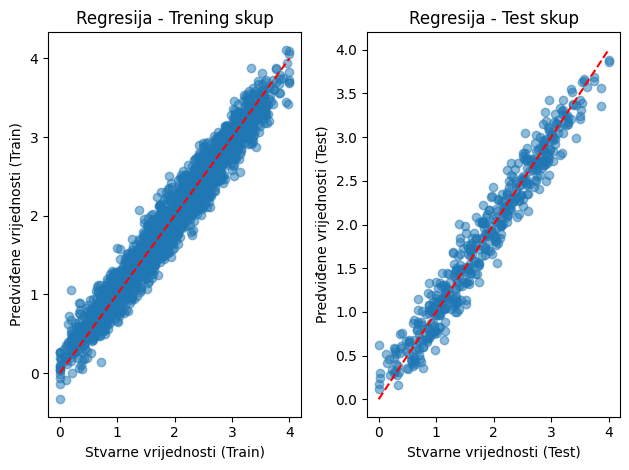

In [16]:
# Trening skup
plt.subplot(1, 2, 1)
plt.scatter(y_train1, y_train_pred1, alpha=0.5)
plt.plot([min(y_train1), max(y_train1)], [min(y_train1), max(y_train1)], color='red', linestyle='--')
plt.xlabel('Stvarne vrijednosti (Train)')
plt.ylabel('Predviđene vrijednosti (Train)')
plt.title('Regresija - Trening skup')

# Test skup
plt.subplot(1, 2, 2)
plt.scatter(y_test1, y_test_pred1, alpha=0.5)
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')
plt.xlabel('Stvarne vrijednosti (Test)')
plt.ylabel('Predviđene vrijednosti (Test)')
plt.title('Regresija - Test skup')

plt.tight_layout()
plt.show()

Crvena linija predstavlja idealnu liniju gdje bi predviđene vrijednosti bile jednake stvarnim. Vidimo da su tačke grupisane blizu linije, pa ovaj rezultat pokazuje da model jako dobro predviđa i na trening skupu i na test skupu, jer su odstupanja mala. Pošto model dobro predviđa i na test skupu, znači da nije došlo do preprilagođavanja.

#***Klasifikacija***

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


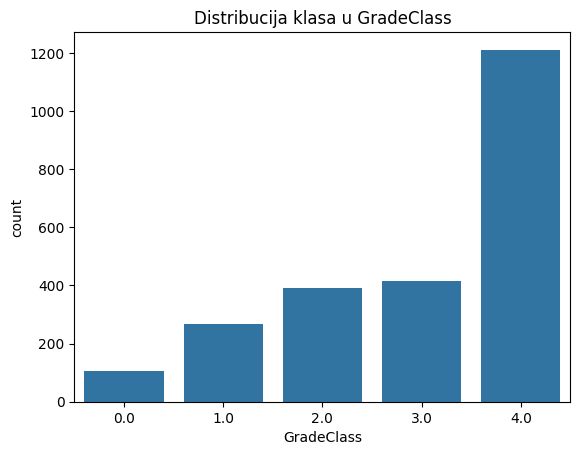

In [17]:
# vizualizacija rasporeda klasa za atribut GradeClass
class_distribution = data['GradeClass'].value_counts()
print(class_distribution)
sns.countplot(x='GradeClass',data=data)
plt.title('Distribucija klasa u GradeClass')
plt.show()

Iz ovog grafika vidimo da ima puno više primjera koji su u klasi 4 (zbog toga model može imati lošu tačnost pri predviđanju klasa koje su manje zastupljene), pa znači da trebamo uraditi oversampling (balansiranje raspodjele klasa u kojoj se povećava broj uzoraka u manjim klasama).

***Oversampling:***

In [18]:
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(random_state=42)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train_std, y_train2)


In [19]:
from sklearn.metrics import roc_auc_score

# sljedeća funkcija se koristi za procjenu performansi klasifikacionog modela na osnovu ulazne i ciljne vrednosti
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    # funkcija vraća četiri ključne vrijednosti:
    acc = accuracy_score(y_val, y_pred) # tačnost - procenat tačnih predikcija
    prec = precision_score(y_val, y_pred, average='weighted')  # preciznost (za višeklasnu klasifikaciju koristimo average='weighted'), prec = TP/(TP+FP) -> TP - tačno klasificirani pozitivni primjeri, FP - primjeri koji su klasificirani kao pozitivni a nisu
    rec = recall_score(y_val, y_pred, average='weighted') # odziv, rec = TP/(TP+FN) -> TP - tačno klasificirani pozitivni primjeri, FP - primjeri koji su klasificirani kao negativni a ustvari su pozitivni
    # AUC score za višeklasnu klasifikaciju - to je sposobnost modela da ispravno razlikuje pozitivne i negativne primjere i to je površina ispod ROC krive (ROC kriva se crta tako da na y-osi imamo True Positive Rate (TP/(TP+FN)), a na x-osi imamo False Positive Rate (FP/(FP+TN)))
    auc = roc_auc_score(y_val, model.predict_proba(X_val), multi_class='ovr')  # one-vs-rest
    return acc, prec, rec, auc


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    min_samples_leaf=20,
    min_samples_split=20,
    max_depth=8,
    n_estimators=400
)

rf.fit(X_train_borderline_smote, y_train_borderline_smote)

print("Na trening skupu:")
acc, prec, rec, auc = evaluate_model(rf, X_train_borderline_smote, y_train_borderline_smote)
print(f"Random Forest - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, AUC: {auc}")

print("Na test skupu:")
acc, prec, rec, auc = evaluate_model(rf, X_test_std, y_test2)
print(f'Random Forest - Accuracy: {acc}, Precision: {prec}, Recall: {rec}, AUC: {auc}')


Na trening skupu:
Random Forest - Accuracy: 0.8355042016806723, Precision: 0.8407894853555495, Recall: 0.8355042016806723, AUC: 0.9672423932808417
Na test skupu:
Random Forest - Accuracy: 0.7181628392484343, Precision: 0.73693991024135, Recall: 0.7181628392484343, AUC: 0.8689109935587649
